In [1]:
#importing packages
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 7973 rows and 31 columns.


In [4]:
#shape
print('This data frame has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

This data frame has 7973 rows and 31 columns.


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [6]:

#numerical summary -> only non-anonymized columns of interest
pd.set_option('precision', 3)
df.loc[:, ['Time', 'Amount']].describe()

,Time,Amount
count,7973.000,7972.000
mean,4257.151,65.414
std,3198.964,194.911
min,0.000,0.000
25%,1531.000,4.617
50%,3635.000,15.950
75%,6662.000,54.910
max,10981.000,7712.430


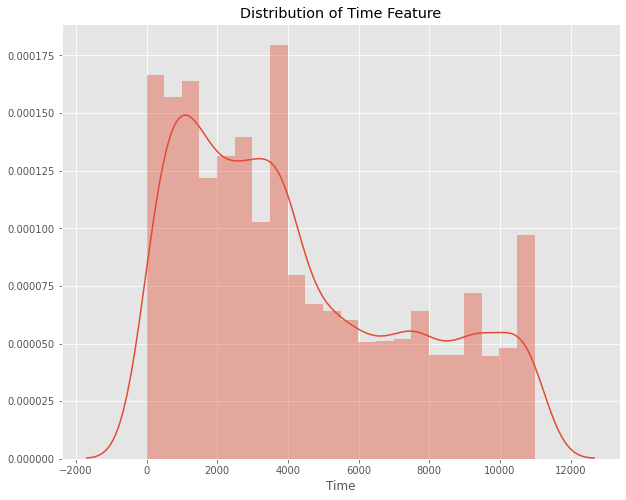

In [7]:

#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(df.Time)

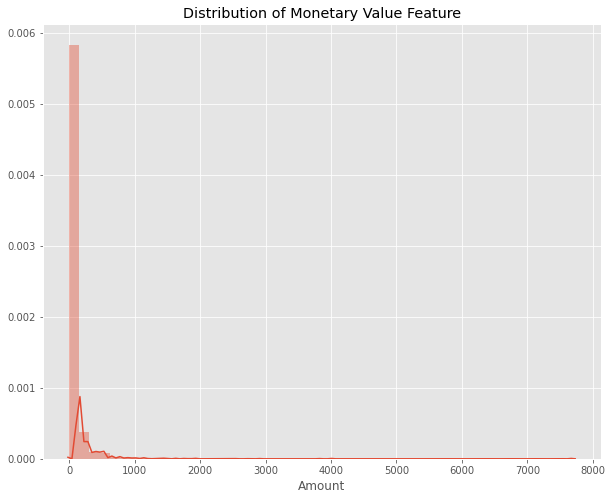

In [9]:
plt.figure(figsize=(10,8))
plt.title('Distribution of Monetary Value Feature')
sns.distplot(df.Amount)

In [10]:
#fraud vs. normal transactions 
counts = df.Class.value_counts()
normal = counts[0]
fraudulent = counts[1]
perc_normal = (normal/(normal+fraudulent))*100
perc_fraudulent = (fraudulent/(normal+fraudulent))*100
print('There were {} non-fraudulent transactions ({:.3f}%) and {} fraudulent transactions ({:.3f}%).'.format(normal, perc_normal, fraudulent, perc_fraudulent))

There were 7947 non-fraudulent transactions (99.686%) and 25 fraudulent transactions (0.314%).


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

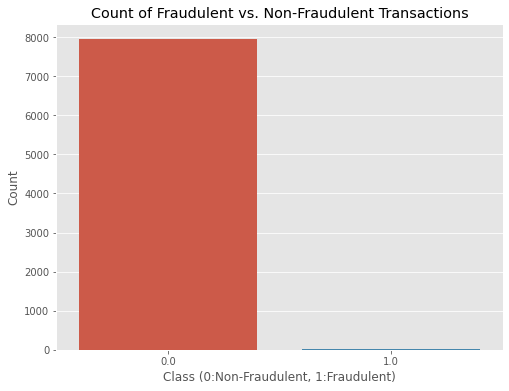

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(x=counts.index, y=counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [12]:
corr = df.corr()
corr

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000,-0.030,0.015,0.087,1.294e-01,-0.021,-0.006,-0.107,-0.033,0.494,-1.179e-01,3.726e-01,-0.674,0.549,4.559e-01,-0.318,5.548e-02,0.322,0.134,-1.165e-01,-0.039,-0.044,-0.035,0.013,-0.006,-0.020,1.753e-01,-5.650e-02,-0.014,0.001,0.054
V1,-0.030,1.000,-0.140,-0.152,6.744e-02,-0.134,0.012,-0.078,0.241,-0.160,-1.922e-01,1.476e-02,-0.034,0.047,1.132e-01,0.083,1.483e-01,0.019,-0.062,2.833e-02,-0.057,-0.120,-0.051,-0.151,0.009,0.219,-2.775e-02,-5.920e-02,0.035,-0.180,-0.032
V2,0.015,-0.140,1.000,-0.042,4.933e-02,0.021,-0.035,0.104,-0.196,-0.012,1.493e-01,5.072e-02,0.011,-0.005,-8.172e-02,0.062,-5.202e-02,0.002,0.057,-2.576e-03,0.014,0.114,-0.117,0.018,-0.019,-0.153,-5.050e-02,7.910e-02,-0.091,-0.494,0.115
V3,0.087,-0.152,-0.042,1.000,1.037e-01,-0.070,-0.171,0.072,0.033,0.131,6.689e-02,-8.207e-02,0.030,-0.002,1.005e-01,-0.236,-1.879e-01,0.018,-0.047,-5.482e-02,-0.072,-0.011,0.290,-0.024,-0.011,-0.244,1.060e-01,-1.145e-01,-0.106,-0.195,-0.291
V4,0.129,0.067,0.049,0.104,1.000e+00,-0.117,0.008,-0.051,0.022,-0.115,6.596e-02,1.519e-02,-0.117,0.116,-1.274e-02,-0.161,-8.478e-02,0.232,0.027,-3.982e-04,-0.045,-0.019,0.007,0.005,-0.056,-0.034,8.928e-02,-3.733e-02,0.035,0.117,0.170
V5,-0.021,-0.134,0.021,-0.070,-1.173e-01,1.000,0.155,-0.119,0.108,-0.030,4.429e-02,-7.504e-03,-0.042,0.044,-3.983e-02,0.115,6.860e-02,-0.131,0.033,2.718e-02,0.065,-0.020,-0.106,0.004,0.019,0.001,-1.649e-01,-5.077e-02,-0.122,-0.428,-0.029
V6,-0.006,0.012,-0.035,-0.171,7.611e-03,0.155,1.000,-0.095,-0.022,0.012,7.387e-02,-8.383e-02,-0.085,0.057,9.366e-02,-0.083,6.334e-02,0.018,-0.029,1.224e-01,-0.005,0.055,-0.069,-0.025,0.040,0.080,-1.600e-02,-2.713e-02,-0.010,0.224,-0.089
V7,-0.107,-0.078,0.104,0.072,-5.107e-02,-0.119,-0.095,1.000,0.195,-0.021,1.019e-01,-2.715e-02,0.098,-0.056,-1.861e-01,0.139,-9.761e-02,-0.195,0.002,-2.952e-03,0.017,-0.140,0.089,-0.053,-0.011,-0.101,-7.395e-02,-6.753e-02,-0.083,0.346,-0.115
V8,-0.033,0.241,-0.196,0.033,2.211e-02,0.108,-0.022,0.195,1.000,-0.075,-8.286e-02,-6.567e-03,-0.061,-0.007,-7.256e-03,-0.033,2.658e-02,-0.024,-0.035,3.710e-02,0.026,-0.284,0.135,-0.067,0.016,0.029,1.252e-02,1.552e-02,0.071,-0.084,0.030
V9,0.494,-0.160,-0.012,0.131,-1.147e-01,-0.030,0.012,-0.021,-0.075,1.000,1.092e-01,1.463e-01,-0.347,0.225,1.398e-01,-0.276,-1.327e-01,0.167,0.016,-9.332e-02,0.061,-0.006,0.030,-0.002,-0.002,0.125,9.960e-02,-5.393e-02,-0.112,-0.021,-0.108


Text(0.5, 1.0, 'Heatmap of Correlation')

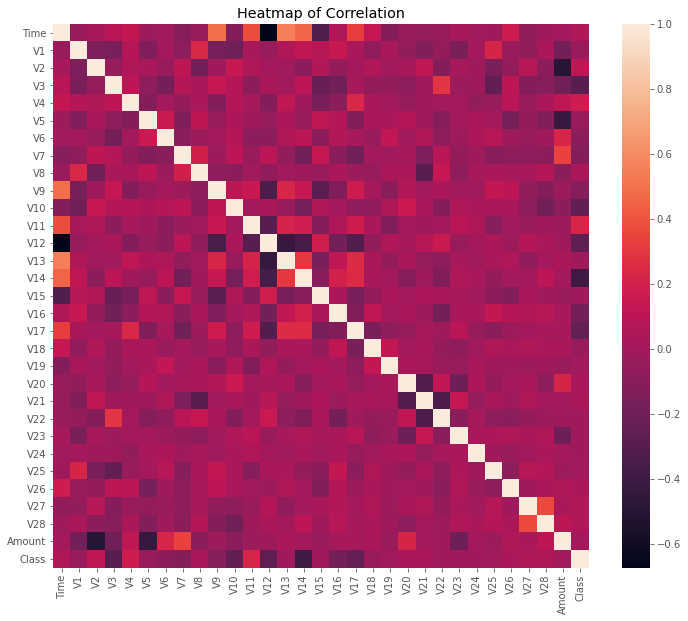

In [13]:
corr = df.corr()
plt.figure(figsize=(12,10))
heat = sns.heatmap(data=corr)
plt.title('Heatmap of Correlation')

In [14]:
skew_ = df.skew()
skew_

Time       0.615
V1        -1.722
V2        -2.597
V3        -1.288
V4         0.101
V5        -1.759
V6         1.707
V7         3.063
V8        -9.793
V9         0.866
V10        2.547
V11        0.281
V12       -0.399
V13       -0.105
V14       -2.085
V15       -0.559
V16       -0.606
V17       -0.375
V18       -0.319
V19       -0.198
V20       -0.019
V21        8.620
V22       -1.100
V23       -3.546
V24       -0.652
V25       -0.237
V26        0.590
V27       -4.637
V28        0.883
Amount    14.823
Class     17.776
dtype: float64

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler2 = StandardScaler()
#scaling time
scaled_time = scaler.fit_transform(df[['Time']])
flat_list1 = [item for sublist in scaled_time.tolist() for item in sublist]
scaled_time = pd.Series(flat_list1)

In [16]:
scaled_amount = scaler2.fit_transform(df[['Amount']])
flat_list2 = [item for sublist in scaled_amount.tolist() for item in sublist]
scaled_amount = pd.Series(flat_list2)

In [17]:

#concatenating newly created columns w original df
df = pd.concat([df, scaled_amount.rename('scaled_amount'), scaled_time.rename('scaled_time')], axis=1)
df.sample(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class,scaled_amount,scaled_time
7336,9856,0.247,-1.884,0.868,0.859,-1.933,-0.469,-0.224,-0.104,2.520,-0.945,0.351,-2.704,0.267,1.409,-0.243,0.170,0.876,0.057,-0.242,0.788,0.034,-0.652,-0.303,0.712,-0.185,0.884,-0.163,0.096,500.00,0.0,2.230,1.750
3874,3423,-0.485,1.260,0.728,0.527,0.536,-1.052,0.818,-0.155,-1.066,-0.574,1.913,0.458,0.047,-0.925,0.333,0.195,0.874,0.796,0.715,0.075,0.063,0.148,-0.191,0.461,-0.279,0.347,-0.034,0.165,0.76,0.0,-0.332,-0.261
1303,1022,-1.838,0.274,0.014,-0.589,-0.642,0.320,0.424,0.933,-0.228,-1.167,-0.746,-0.025,-1.368,0.817,-1.210,0.735,-0.426,0.520,0.667,-0.389,-0.103,-0.512,0.208,-0.838,-0.006,0.395,-0.170,-0.285,158.00,0.0,0.475,-1.011
5262,5104,0.208,-1.875,0.619,0.520,-1.208,0.751,-0.301,0.126,2.036,-0.871,1.982,-1.219,2.024,1.247,-0.834,0.184,0.565,0.103,-0.075,0.901,0.090,-0.404,-0.387,-0.248,-0.141,0.931,-0.140,0.079,500.00,0.0,2.230,0.265
4791,4263,-1.467,1.211,1.892,-0.282,-0.215,-0.202,1.548,-0.284,0.907,-1.199,0.754,-2.554,1.270,1.465,-0.631,0.368,0.001,-0.392,-2.649,-0.545,-0.039,0.097,-0.303,0.321,0.586,-0.631,-0.299,0.016,153.00,0.0,0.449,0.002


In [18]:
#dropping old amount and time columns
df.drop(['Amount', 'Time'], axis=1, inplace=True)

In [19]:
mask = np.random.rand(len(df)) < 0.9
train = df[mask]
test = df[~mask]
print('Train Shape: {}\nTest Shape: {}'.format(train.shape, test.shape))

Train Shape: (7162, 31)
Test Shape: (811, 31)


In [20]:

train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [21]:
#how many random samples from normal transactions do we need?
no_of_frauds = train.Class.value_counts()[1]
print('There are {} fraudulent transactions in the train data.'.format(no_of_frauds))

There are 24 fraudulent transactions in the train data.


In [22]:
#randomly selecting 442 random non-fraudulent transactions
non_fraud = train[train['Class'] == 0]
fraud = train[train['Class'] == 1]

In [23]:
selected = non_fraud.sample(no_of_frauds)
selected.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
2810,-2.573,-0.407,-0.191,1.295,-0.737,1.420,1.005,1.012,-0.988,-1.015,0.449,0.501,-0.026,1.116,2.167,-1.230,1.406,-1.765,-1.233,-0.357,0.344,1.038,0.896,-0.611,-0.408,-0.211,0.226,-0.526,0.0,1.267,-0.482
2481,-1.135,1.720,0.856,0.121,0.387,0.259,-0.300,-3.404,-0.119,-0.034,-0.941,-0.412,-0.095,-0.412,1.287,0.304,0.116,0.305,0.890,-0.539,2.759,-1.712,0.289,-0.554,-0.395,0.173,0.100,-0.054,0.0,-0.325,-0.608
7042,1.174,-0.093,0.778,0.429,-0.642,-0.420,-0.307,-0.130,1.957,-0.798,0.852,-1.546,2.048,1.148,-0.870,-0.807,1.290,-1.063,-0.233,-0.114,-0.203,-0.057,0.005,0.456,0.317,1.080,-0.076,-0.003,0.0,-0.238,2.083
6087,1.228,-1.057,0.565,-0.590,-0.792,0.850,-1.237,0.144,1.305,0.057,-0.684,-3.470,1.888,0.733,0.013,1.294,0.830,-0.696,0.396,0.227,0.149,0.563,-0.318,-1.326,0.504,0.022,0.018,0.018,0.0,0.214,1.340
6184,-1.732,1.628,1.173,-1.526,-0.298,-0.617,0.293,0.172,2.205,0.649,1.729,-2.716,0.123,1.504,-0.670,0.828,-0.272,0.628,-0.618,0.547,-0.373,-0.552,-0.050,-0.084,-0.148,0.711,0.750,0.453,0.0,-0.296,1.427


In [24]:
#concatenating both into a subsample data set with equal class distribution
selected.reset_index(drop=True, inplace=True)
fraud.reset_index(drop=True, inplace=True)

In [25]:
subsample = pd.concat([selected, fraud])
len(subsample)

48

In [26]:
subsample = subsample.sample(frac=1).reset_index(drop=True)
subsample.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,0.965,-0.540,0.426,0.705,-0.587,-0.048,-0.357,-0.087,1.921,-0.511,-0.443,-3.054,1.291,1.544,0.725,0.834,-0.100,0.858,-0.320,0.215,0.070,0.090,-0.338,-0.584,0.399,0.621,-0.078,0.033,0.0,0.589,0.852
1,1.321,0.072,0.174,-0.171,-0.107,-0.323,-0.251,-0.106,1.366,-0.384,1.653,-1.992,1.590,1.859,-0.219,0.673,-0.110,0.565,0.471,-0.092,-0.267,-0.540,-0.053,-0.504,0.291,0.957,-0.116,-0.022,0.0,-0.332,1.109
2,-1.586,3.262,-4.137,2.357,-1.405,-1.879,-3.514,1.516,-1.207,-6.235,5.451,-7.334,1.361,-6.608,-0.481,-2.602,-4.835,-0.553,0.352,0.316,0.502,-0.547,-0.077,-0.426,0.124,0.322,0.264,0.133,1.0,-0.330,1.136
3,-2.573,-0.407,-0.191,1.295,-0.737,1.420,1.005,1.012,-0.988,-1.015,0.449,0.501,-0.026,1.116,2.167,-1.230,1.406,-1.765,-1.233,-0.357,0.344,1.038,0.896,-0.611,-0.408,-0.211,0.226,-0.526,0.0,1.267,-0.482
4,0.703,2.426,-5.235,4.417,-2.171,-2.668,-3.878,0.911,-0.166,-5.009,4.676,-8.167,0.639,-6.763,1.297,-3.812,-3.754,-1.049,1.554,0.423,0.551,-0.010,0.722,0.473,-1.959,0.319,0.600,0.129,1.0,-0.330,1.068
5,-3.499,0.259,-4.490,4.854,-6.975,3.628,5.431,-1.947,-0.776,-1.988,4.690,-6.998,1.454,-3.738,0.318,-2.014,-5.136,-1.184,1.663,-3.043,-1.052,0.205,-2.119,0.170,-0.394,0.296,1.986,-0.900,1.0,8.950,1.503
6,0.027,4.132,-6.561,6.349,1.330,-2.513,-1.689,0.303,-3.139,-6.045,6.755,-8.948,0.703,-10.734,-1.380,-1.639,-1.746,0.777,-1.327,0.588,0.371,-0.577,-0.670,-0.760,1.605,0.541,0.737,0.497,1.0,-0.330,1.025
7,0.817,-0.280,1.354,2.860,-0.792,0.724,-0.663,0.299,1.372,0.267,1.136,-2.568,0.150,1.535,-1.531,0.976,0.038,0.895,-0.668,0.024,-0.133,-0.433,-0.111,-0.109,0.182,-0.089,-0.026,0.039,0.0,0.439,-0.202
8,1.228,-1.057,0.565,-0.590,-0.792,0.850,-1.237,0.144,1.305,0.057,-0.684,-3.470,1.888,0.733,0.013,1.294,0.830,-0.696,0.396,0.227,0.149,0.563,-0.318,-1.326,0.504,0.022,0.018,0.018,0.0,0.214,1.340
9,-0.440,0.995,1.357,-0.050,0.108,-0.315,0.501,0.235,-0.577,-0.370,1.782,0.422,-0.659,-0.066,0.500,0.257,0.146,-0.080,-0.233,0.047,-0.178,-0.477,0.037,0.155,-0.312,0.074,0.254,0.085,0.0,-0.313,-1.213


Text(0.5, 0, 'Class (0:Non-Fraudulent, 1:Fraudulent)')

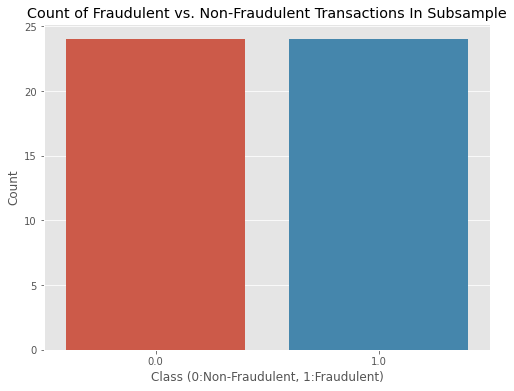

In [27]:
new_counts = subsample.Class.value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=new_counts.index, y=new_counts)
plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
plt.ylabel('Count')
plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

In [28]:
corr = subsample.corr()
corr = corr[['Class']]
corr

,Class
V1,-0.327
V2,0.661
V3,-0.862
V4,0.817
V5,-0.147
V6,-0.676
V7,-0.511
V8,0.344
V9,-0.681
V10,-0.869


In [29]:
corr[corr.Class < -0.5]

,Class
V3,-0.862
V6,-0.676
V7,-0.511
V9,-0.681
V10,-0.869
V12,-0.864
V14,-0.894
V16,-0.632
V17,-0.546


In [30]:
corr[corr.Class > 0.5]

,Class
V2,0.661
V4,0.817
V11,0.850
Class,1.000


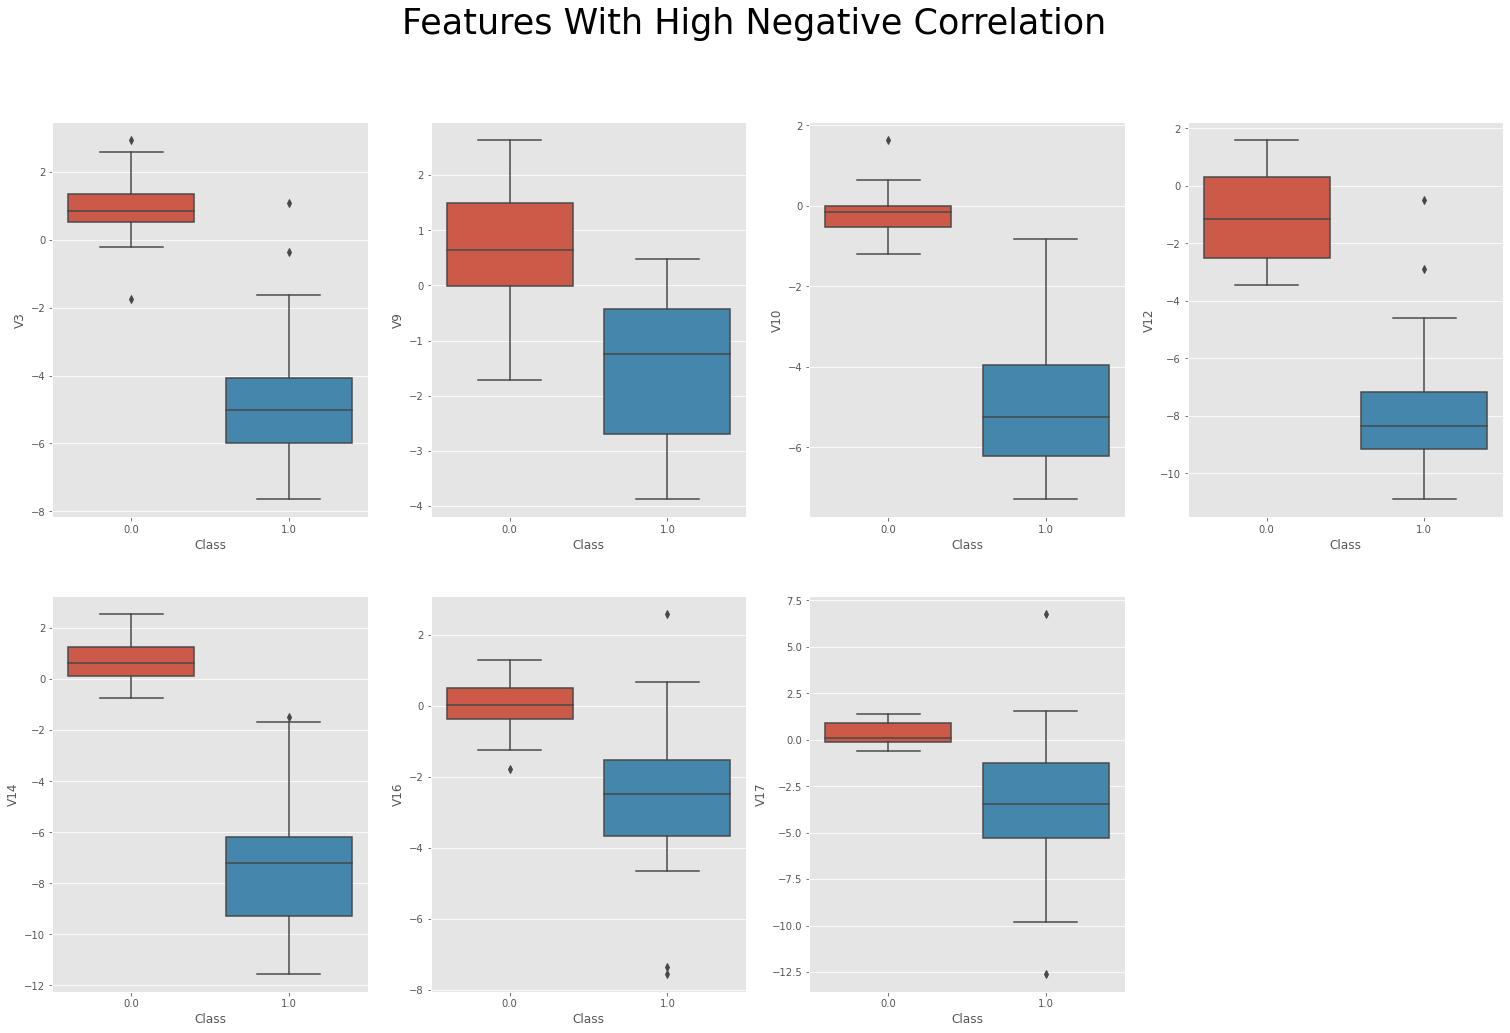

In [31]:
f, axes = plt.subplots(nrows=2, ncols=4, figsize=(26,16))

f.suptitle('Features With High Negative Correlation', size=35)
sns.boxplot(x="Class", y="V3", data=subsample, ax=axes[0,0])
sns.boxplot(x="Class", y="V9", data=subsample, ax=axes[0,1])
sns.boxplot(x="Class", y="V10", data=subsample, ax=axes[0,2])
sns.boxplot(x="Class", y="V12", data=subsample, ax=axes[0,3])
sns.boxplot(x="Class", y="V14", data=subsample, ax=axes[1,0])
sns.boxplot(x="Class", y="V16", data=subsample, ax=axes[1,1])
sns.boxplot(x="Class", y="V17", data=subsample, ax=axes[1,2])
f.delaxes(axes[1,3])

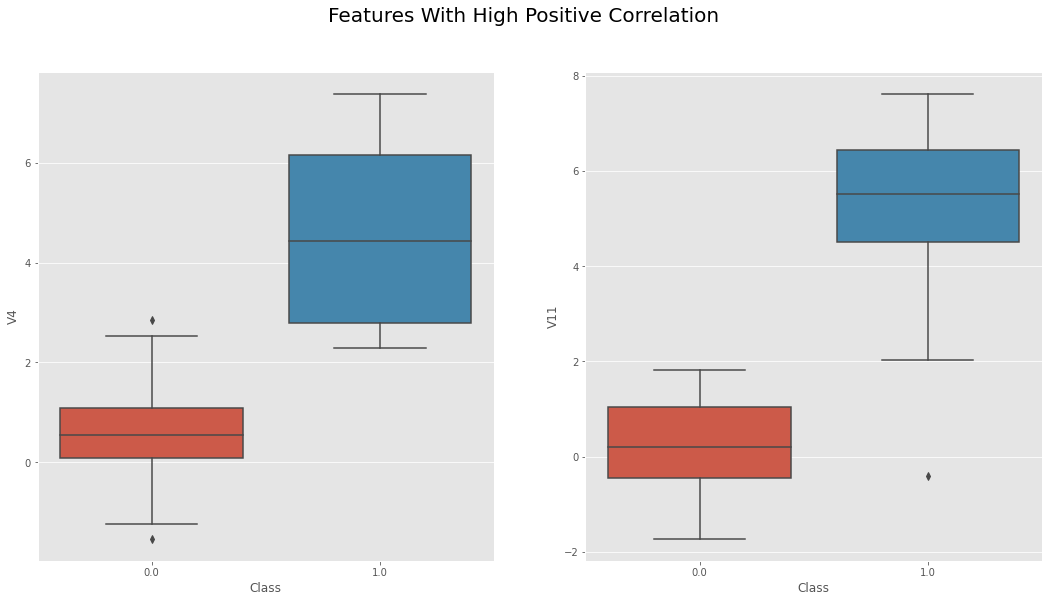

In [32]:

#visualizing the features w high positive correlation
f, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,9))

f.suptitle('Features With High Positive Correlation', size=20)
sns.boxplot(x="Class", y="V4", data=subsample, ax=axes[0])
sns.boxplot(x="Class", y="V11", data=subsample, ax=axes[1])

In [33]:

#Only removing extreme outliers
Q1 = subsample.quantile(0.25)
Q3 = subsample.quantile(0.75)
IQR = Q3 - Q1

df2 = subsample[~((subsample < (Q1 - 2.5 * IQR)) |(subsample > (Q3 + 2.5 * IQR))).any(axis=1)]

In [34]:
len_after = len(df2)
len_before = len(subsample)
len_difference = len(subsample) - len(df2)
print('We reduced our data size from {} transactions by {} transactions to {} transactions.'.format(len_before, len_difference, len_after))

We reduced our data size from 48 transactions by 14 transactions to 34 transactions.


In [35]:
from sklearn.manifold import TSNE

X = df2.drop('Class', axis=1)
y = df2['Class']

In [36]:
#t-SNE
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X.values)

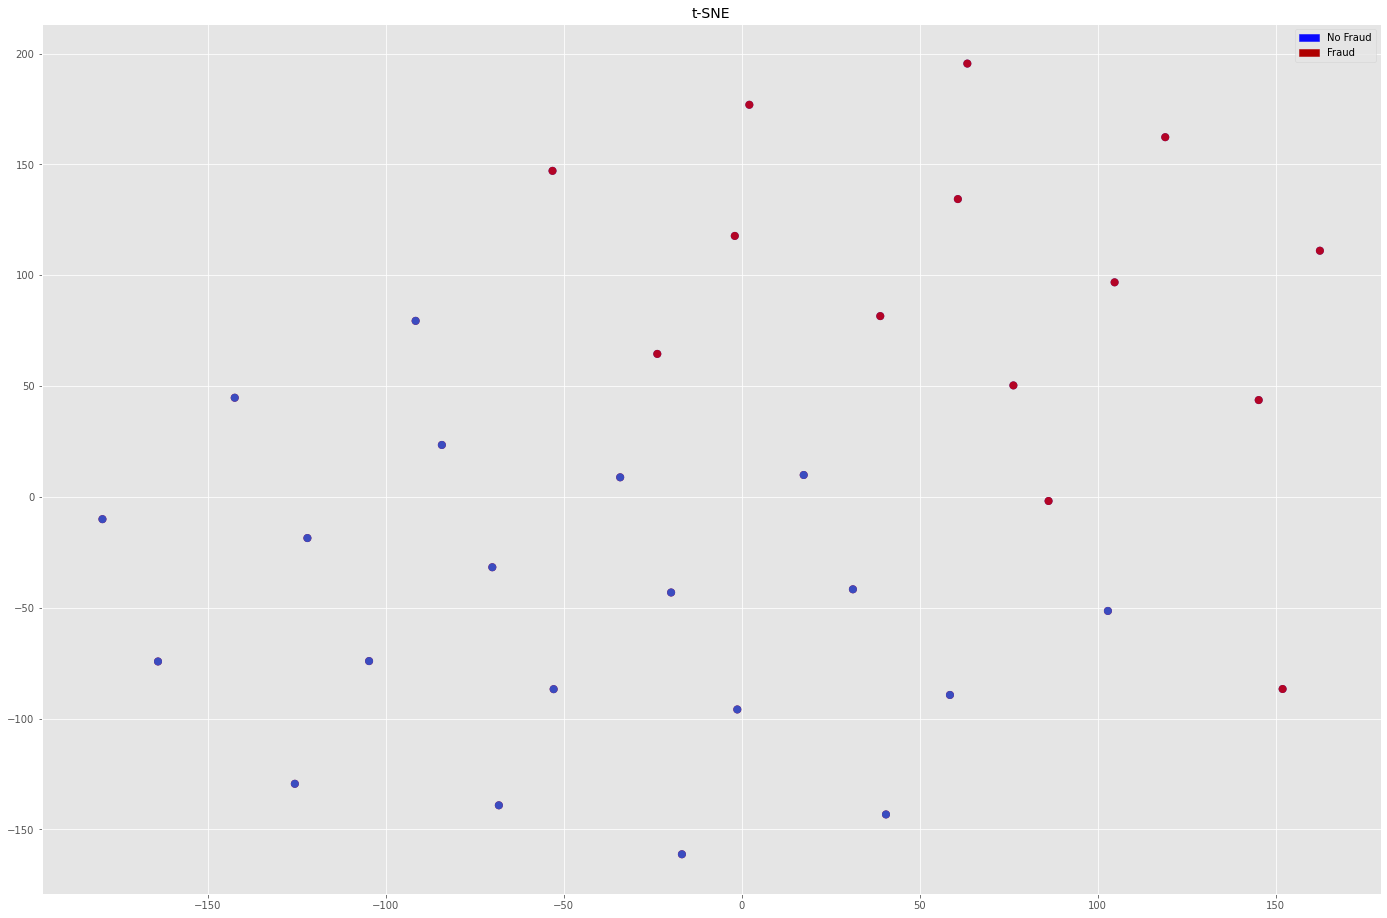

In [37]:
# t-SNE scatter plot
import matplotlib.patches as mpatches

f, ax = plt.subplots(figsize=(24,16))


blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_reduced_tsne[:,0], X_reduced_tsne[:,1], c=(y == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

In [38]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [39]:

# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
X_train = X_train.values
X_validation = X_test.values
y_train = y_train.values
y_validation = y_test.values

In [41]:

print('X_shapes:\n', 'X_train:', 'X_validation:\n', X_train.shape, X_validation.shape, '\n')
print('Y_shapes:\n', 'Y_train:', 'Y_validation:\n', y_train.shape, y_validation.shape)

X_shapes:
 X_train: X_validation:
 (27, 30) (7, 30) 

Y_shapes:
 Y_train: Y_validation:
 (27,) (7,)


In [42]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

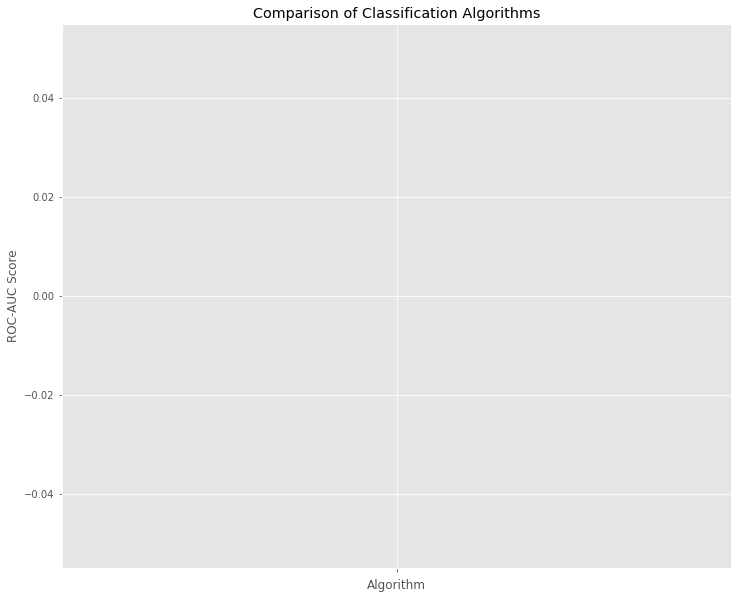

In [44]:

fig = plt.figure(figsize=(12,10))
plt.title('Comparison of Classification Algorithms')
plt.xlabel('Algorithm')
plt.ylabel('ROC-AUC Score')
plt.boxplot(results)
ax = fig.add_subplot(111)
ax.set_xticklabels(names)
plt.show()

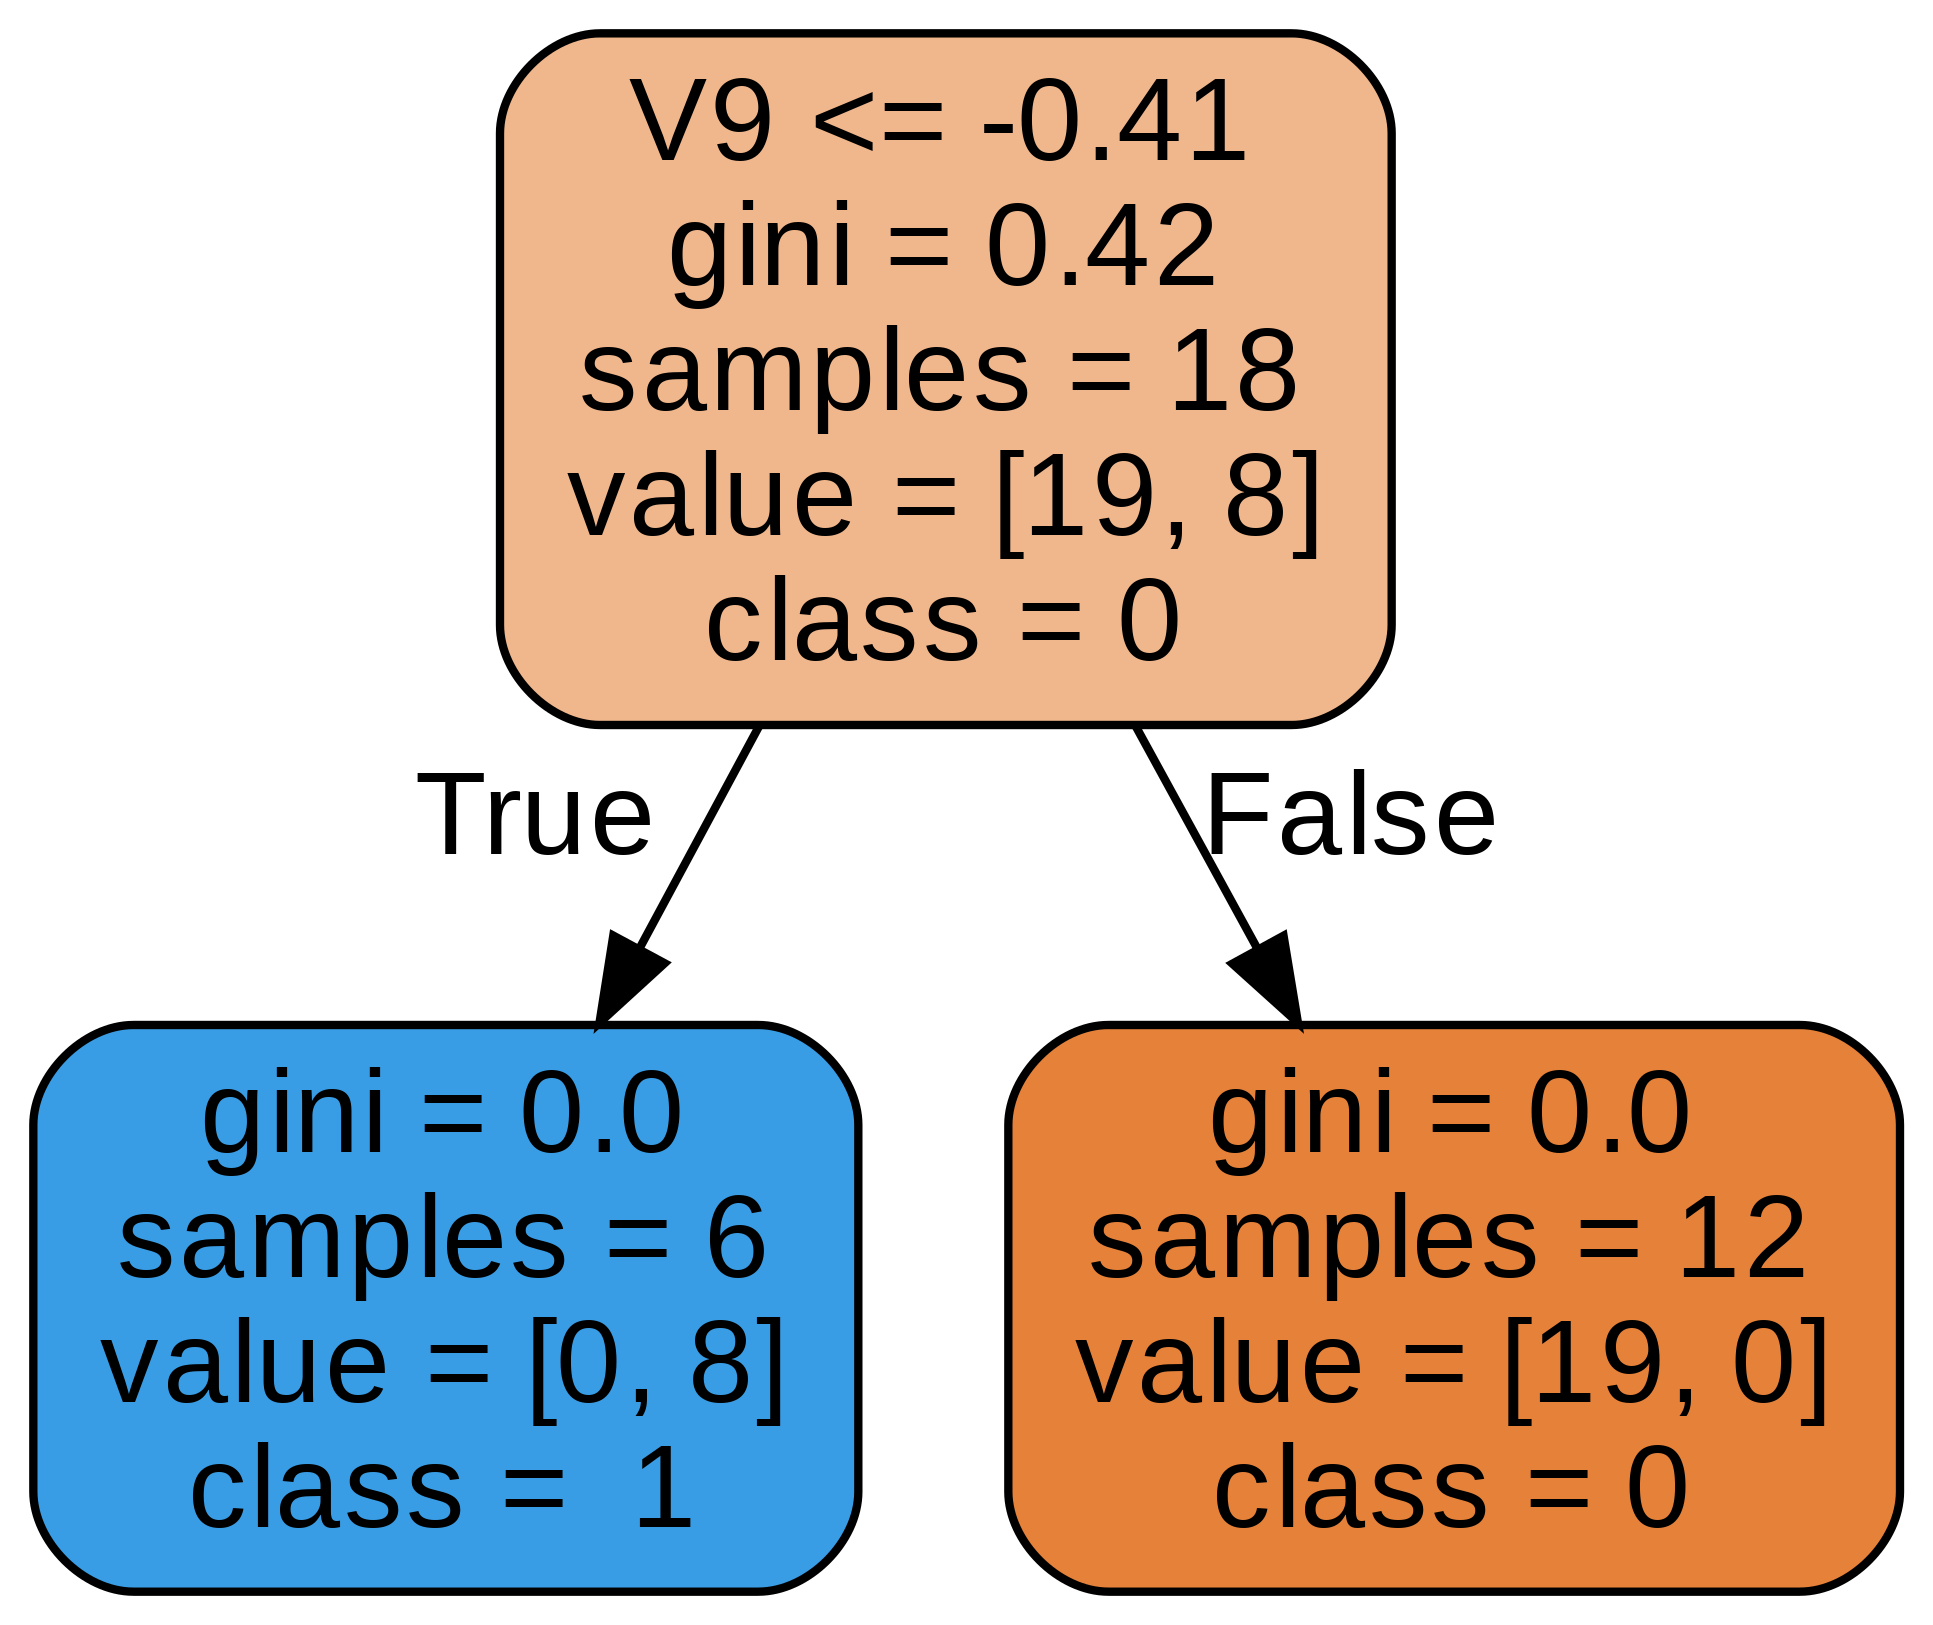

In [47]:
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(X_train, y_train)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = X.columns.tolist(),
                class_names = ['0',' 1'],
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')